<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Klasifikasi_program_pkh_(Fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import graphviz

#Library SVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# #Library Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score

# #Library C4.5
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
# import pydotplus
# from IPython.display import Image


# #K-fold Cross Validation
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

#Import Dataset

Jobs
1 = Buruh
2 = Petani
3 = pedagang
4 = PNS
5 = Pengangguran
6 = Karyawan Swasta
7 = Freelancer

gender
1 = Laki - laki
2 = Perempuan

kriteria
1 = Sangat Miski
2 = Miskin
3 = Tidak Miskin

Status
1 = Menikah
2 = Belum Menikah
3 = Cerai


In [2]:
df = pd.read_csv('/content/pkh_data_program_PKH_71807.csv')
df

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
0,SARKOCI,18,Majalengka,10,4290968,1,2,1,2,4,0
1,KURDI,63,Majalengka,8,6022459,1,1,0,0,3,0
2,SUMARNA,63,Majalengka,6,4205424,1,3,2,3,1,0
3,ANTRI,36,Majalengka,10,2067113,2,0,0,1,1,0
4,SUMISNAH,25,Majalengka,3,1583659,2,3,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
71802,SUADAH,28,Majalengka,9,3090367,1,3,0,0,2,0
71803,DEDEH WIDANINGSIH,38,Majalengka,7,5795626,1,1,1,0,2,0
71804,JUMHADI,34,Majalengka,8,3882164,2,2,1,0,2,0
71805,ETI ROHAETI,31,Majalengka,3,686457,1,1,0,2,2,1


#Data Understanding

In [3]:
print("data shape", df.shape)

data shape (71807, 11)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71807 entries, 0 to 71806
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nama                   71807 non-null  object
 1   umur                   71807 non-null  int64 
 2   tempat lahir           71807 non-null  object
 3   jenis pekerjaan        71807 non-null  int64 
 4   jumlah penghasilan     71807 non-null  int64 
 5   jenis kelamin          71807 non-null  int64 
 6   jumlah keluarga (SD)   71807 non-null  int64 
 7   jumlah keluarga (SMP)  71807 non-null  int64 
 8   jumlah keluarga (SMA)  71807 non-null  int64 
 9   status perkawinan      71807 non-null  int64 
 10  penerima PKH           71807 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 6.0+ MB


In [5]:
df.describe()

,umur,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
count,71807.000000,71807.000000,7.180700e+04,71807.000000,71807.000000,71807.000000,71807.000000,71807.000000,71807.000000
mean,41.386299,5.510661,3.495937e+06,1.500258,1.504199,1.493100,1.494771,2.499533,0.092164
std,13.830408,2.875601,2.021192e+06,0.500003,1.119422,1.119122,1.119181,1.119280,0.289259
min,18.000000,1.000000,5.800000e+01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,3.000000,1.744424e+06,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,41.000000,6.000000,3.497580e+06,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000
75%,53.000000,8.000000,5.250182e+06,2.000000,3.000000,2.000000,2.000000,4.000000,0.000000
max,65.000000,10.000000,6.999896e+06,2.000000,3.000000,3.000000,3.000000,4.000000,1.000000


In [6]:
df['penerima PKH'].value_counts()


,count
penerima PKH,
0,65189
1,6618


#Cleaning Data

In [7]:
df.isnull().sum()

,0
nama,0
umur,0
tempat lahir,0
jenis pekerjaan,0
jumlah penghasilan,0
jenis kelamin,0
jumlah keluarga (SD),0
jumlah keluarga (SMP),0
jumlah keluarga (SMA),0
status perkawinan,0


In [8]:
#mencari duplikasi
df.duplicated().sum()

0

#Exploratory Data Analysisi(EDA)

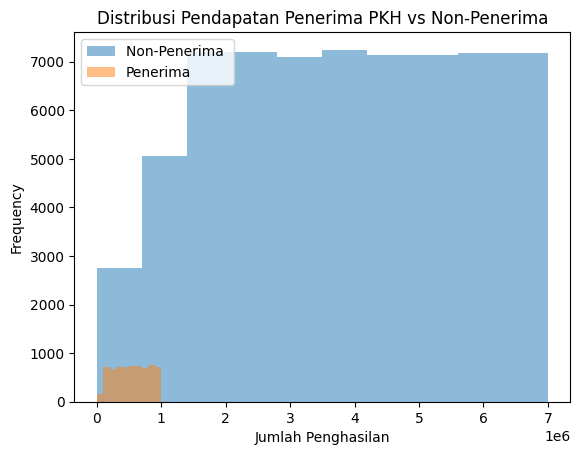

In [9]:
# Distribusi Pendapatan Penerima PKH vs Non-Penerima



plt.hist(df[df['penerima PKH'] == 0]['jumlah penghasilan'], alpha=0.5, label='Non-Penerima ')
plt.hist(df[df['penerima PKH'] == 1]['jumlah penghasilan'], alpha=0.5, label='Penerima')
plt.xlabel('Jumlah Penghasilan')
plt.ylabel('Frequency')
plt.title('Distribusi Pendapatan Penerima PKH vs Non-Penerima')
_ = plt.legend()

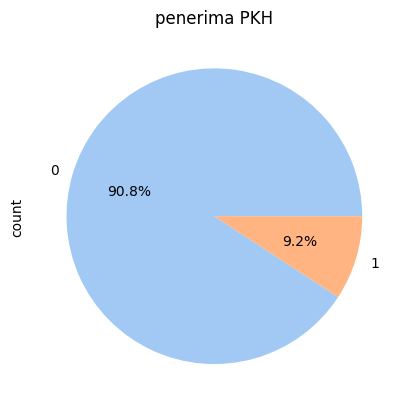

In [10]:
sns.set_palette('pastel')
df['penerima PKH'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('penerima PKH')
plt.show()

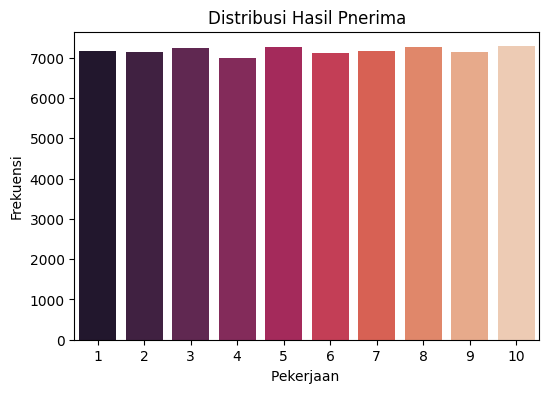

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='jenis pekerjaan', palette='rocket')

plt.title('Distribusi Hasil Pnerima')
plt.xlabel('Pekerjaan ')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
df = df.drop(columns=['nama','tempat lahir'])
df.corr()

,umur,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
umur,1.000000,-0.003556,-0.003962,-0.001105,-0.002404,0.001505,0.000437,-0.002252,-0.003657
jenis pekerjaan,-0.003556,1.000000,0.000496,0.002868,0.000361,-0.010353,-0.000068,-0.003182,-0.002688
jumlah penghasilan,-0.003962,0.000496,1.000000,0.002795,-0.001028,0.000247,0.001003,0.004477,-0.465548
jenis kelamin,-0.001105,0.002868,0.002795,1.000000,0.003289,0.002884,-0.001348,-0.002843,-0.006230
jumlah keluarga (SD),-0.002404,0.000361,-0.001028,0.003289,1.000000,-0.006233,-0.002092,0.002450,-0.008335
jumlah keluarga (SMP),0.001505,-0.010353,0.000247,0.002884,-0.006233,1.000000,0.001236,-0.002018,-0.008747
jumlah keluarga (SMA),0.000437,-0.000068,0.001003,-0.001348,-0.002092,0.001236,1.000000,-0.001083,-0.009395
status perkawinan,-0.002252,-0.003182,0.004477,-0.002843,0.002450,-0.002018,-0.001083,1.000000,-0.006061
penerima PKH,-0.003657,-0.002688,-0.465548,-0.006230,-0.008335,-0.008747,-0.009395,-0.006061,1.000000


#Preparation Data

In [13]:
x = df.drop(columns=['penerima PKH'])
y = df['penerima PKH']

print("X : ", x.shape)
print("y : ", y.shape)

X :  (71807, 8)
y :  (71807,)


In [22]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Modeling dan Evaluasi

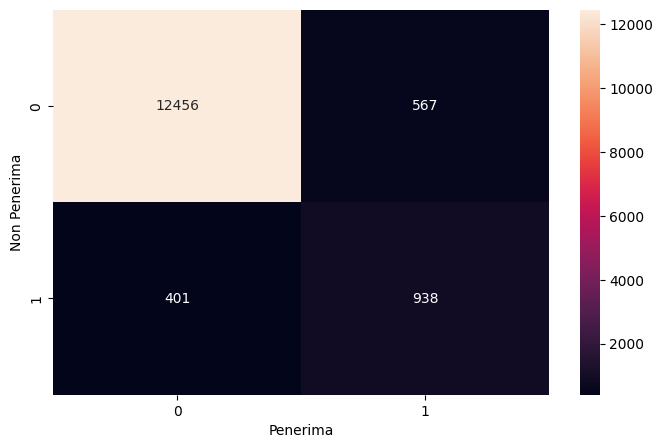

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Penerima")
plt.ylabel("Non Penerima")
plt.show()

In [25]:
#Model Support Vector Machine
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi model SVM : {:.2f}%".format(CLF_acc*100))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96     13023
           1       0.62      0.70      0.66      1339

    accuracy                           0.93     14362
   macro avg       0.80      0.83      0.81     14362
weighted avg       0.94      0.93      0.93     14362

Akurasi model SVM : 93.26%


#Testing

Jobs
1 = Buruh
2 = Petani
3 = Guru
4 = ibu rumah tangga
5 = pedagang
6 = sopir
7 = PNS
8 = Pengangguran
9 = Dokter
10 = Satpam

gender
1 = Laki - laki
2 = Perempuan

Status
1 = Belum Menikah
2 = Sudah Menikah
3 = Janda
4 = Duda


In [ ]:
new_data = {
            'nama' : ['Saripah','Santi',"oay", "Cici","caca","cucu"],
            'umur' : [59, 29, 30, 35, 45, 78],
            'tempat lahir' : ['Majalengka', 'Majalengka', "Majalengka","Majalengka","Majalengka","Majalengka"],
            'jenis pekerjaan' : [7, 10, 3, 2, 3, 7],
            'jumlah penghasilan' : [50000, 10000000, 3000000, 6000000,2000000, 40000],
            'jenis kelamin' : [2, 2, 1, 2, 2, 1],
            'jumlah keluarga (SD)' : [0, 0, 2, 4, 5, 1],
            'jumlah keluarga (SMP)' : [0, 0, 0, 3, 0, 0],
            'jumlah keluarga (SMA)' : [0, 0, 0, 1, 2, 3],
            'status perkawinan' : [3, 1, 1, 3, 2, 1]
             }
new_data = pd.DataFrame(new_data)
new_data

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan
0,Saripah,59,Majalengka,7,50000,2,0,0,0,3
1,Santi,29,Majalengka,10,10000000,2,0,0,0,1
2,oay,30,Majalengka,3,3000000,1,2,0,0,1
3,Cici,35,Majalengka,2,6000000,2,4,3,1,3
4,caca,45,Majalengka,3,2000000,2,5,0,2,2
5,cucu,78,Majalengka,7,40000,1,1,0,3,1


1 = Penerima PKH
0 = Tidak

In [ ]:
# Asumsikan clf_svm adalah model SVM yang sudah dilatih
# Misalnya: clf_svm.fit(X_train_scaled, y_train)

# Prediksi menggunakan data numerik yang sudah di-scale
data_baru= new_data.drop(columns=['nama','tempat lahir'])

scaled_new_data = scaler.transform(data_baru)
y_pred_new = clf.predict(scaled_new_data)

print("Prediksi:", y_pred_new)

Prediksi: [1 0 0 0 0 1]
